In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
from operator import itemgetter


In [2]:
#read the csv file and save to pandas dataframe
raw_data_df = pd.read_csv('resources/realtor-data.csv')
raw_data_df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
#check what is the metadata of this raw dataframe
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


In [4]:
#check if there are any duplicates and drop them 

# making a bool series
bool_series = raw_data_df.duplicated(keep = False)
 
# bool series
bool_series
 
# passing NOT of bool series to see unique values only
raw_data_df1 = raw_data_df[~bool_series]
 
# displaying data
raw_data_df1.info()
raw_data_df1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20814 entries, 47 to 923147
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status        20814 non-null  object 
 1   price         20814 non-null  float64
 2   bed           15855 non-null  float64
 3   bath          16345 non-null  float64
 4   acre_lot      13114 non-null  float64
 5   full_address  20814 non-null  object 
 6   street        20544 non-null  object 
 7   city          20810 non-null  object 
 8   state         20814 non-null  object 
 9   zip_code      20812 non-null  float64
 10  house_size    13177 non-null  float64
 11  sold_date     9363 non-null   object 
dtypes: float64(6), object(6)
memory usage: 2.1+ MB


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
47,for_sale,149900.0,1.0,1.0,0.26,"Bo Espinal Carr # 442, Aguada, PR, 00602",Bo Espinal Carr # 442,Aguada,Puerto Rico,602.0,2100.0,NaN
48,for_sale,180000.0,2.0,2.0,0.24,"4417 Br, Aguada, PR, 00602",4417 Br,Aguada,Puerto Rico,602.0,1138.0,NaN
52,for_sale,90000.0,2.0,1.0,0.07,"A-18 Condominio Los Almendros, Aguada, PR, 00602",A-18 Condominio Los Almendros,Aguada,Puerto Rico,602.0,813.0,NaN
56,for_sale,10000000.0,6.0,5.0,0.12,"441 Bo Carrizal Km 2 6 Unit 4, Aguada, PR, 00602",441 Bo Carrizal Km 2 6 Unit 4,Aguada,Puerto Rico,602.0,6000.0,NaN
70,for_sale,600000.0,6.0,5.0,0.10,"Pr, Aguada, PR, 00602",Pr,Aguada,Puerto Rico,602.0,2400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
923135,for_sale,1649000.0,4.0,3.0,0.17,"10 Butler St, Cos Cob, CT, 06807",10 Butler St,Cos Cob,Connecticut,6807.0,2178.0,5/10/16
923136,for_sale,779000.0,4.0,3.0,0.59,"44 Laura Dr, Airmont, NY, 10952",44 Laura Dr,Airmont,New York,10952.0,1816.0,12/22/04
923144,for_sale,1595000.0,5.0,4.0,0.16,"65 Bruce Park Ave, Greenwich, CT, 06830",65 Bruce Park Ave,Greenwich,Connecticut,6830.0,2231.0,2/19/14
923146,for_sale,4595000.0,4.0,5.0,0.14,"51 Connecticut Ave, Greenwich, CT, 06830",51 Connecticut Ave,Greenwich,Connecticut,6830.0,4863.0,1/19/16


There is a lot of duplicate data. We came from 92k rows to 20k after removing the duplicates

In [5]:
# We want to analyze the recent data that was listed or sold starting 2000
raw_data_df3=raw_data_df1.loc[raw_data_df1['sold_date'] > '01/01/2000']

#Keep the data that is currently on market meaning sold_date is null
raw_data_df2= raw_data_df1[raw_data_df1['sold_date'].isna()]

#create final clean dataframe
clean_data_df = pd.concat([raw_data_df2,raw_data_df3])
clean_data_df
clean_data_df.reset_index()

,index,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,47,for_sale,149900.0,1.0,1.0,0.26,"Bo Espinal Carr # 442, Aguada, PR, 00602",Bo Espinal Carr # 442,Aguada,Puerto Rico,602.0,2100.0,NaN
1,48,for_sale,180000.0,2.0,2.0,0.24,"4417 Br, Aguada, PR, 00602",4417 Br,Aguada,Puerto Rico,602.0,1138.0,NaN
2,52,for_sale,90000.0,2.0,1.0,0.07,"A-18 Condominio Los Almendros, Aguada, PR, 00602",A-18 Condominio Los Almendros,Aguada,Puerto Rico,602.0,813.0,NaN
3,56,for_sale,10000000.0,6.0,5.0,0.12,"441 Bo Carrizal Km 2 6 Unit 4, Aguada, PR, 00602",441 Bo Carrizal Km 2 6 Unit 4,Aguada,Puerto Rico,602.0,6000.0,NaN
4,70,for_sale,600000.0,6.0,5.0,0.10,"Pr, Aguada, PR, 00602",Pr,Aguada,Puerto Rico,602.0,2400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20809,923135,for_sale,1649000.0,4.0,3.0,0.17,"10 Butler St, Cos Cob, CT, 06807",10 Butler St,Cos Cob,Connecticut,6807.0,2178.0,5/10/16
20810,923136,for_sale,779000.0,4.0,3.0,0.59,"44 Laura Dr, Airmont, NY, 10952",44 Laura Dr,Airmont,New York,10952.0,1816.0,12/22/04
20811,923144,for_sale,1595000.0,5.0,4.0,0.16,"65 Bruce Park Ave, Greenwich, CT, 06830",65 Bruce Park Ave,Greenwich,Connecticut,6830.0,2231.0,2/19/14
20812,923146,for_sale,4595000.0,4.0,5.0,0.14,"51 Connecticut Ave, Greenwich, CT, 06830",51 Connecticut Ave,Greenwich,Connecticut,6830.0,4863.0,1/19/16


In [6]:
clean_data_df = clean_data_df.drop(columns=['sold_date', 'full_address'])

In [7]:
clean_data_df=clean_data_df.dropna()

In [8]:
clean_data_df

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
47,for_sale,149900.0,1.0,1.0,0.26,Bo Espinal Carr # 442,Aguada,Puerto Rico,602.0,2100.0
48,for_sale,180000.0,2.0,2.0,0.24,4417 Br,Aguada,Puerto Rico,602.0,1138.0
52,for_sale,90000.0,2.0,1.0,0.07,A-18 Condominio Los Almendros,Aguada,Puerto Rico,602.0,813.0
56,for_sale,10000000.0,6.0,5.0,0.12,441 Bo Carrizal Km 2 6 Unit 4,Aguada,Puerto Rico,602.0,6000.0
70,for_sale,600000.0,6.0,5.0,0.10,Pr,Aguada,Puerto Rico,602.0,2400.0
...,...,...,...,...,...,...,...,...,...,...
923135,for_sale,1649000.0,4.0,3.0,0.17,10 Butler St,Cos Cob,Connecticut,6807.0,2178.0
923136,for_sale,779000.0,4.0,3.0,0.59,44 Laura Dr,Airmont,New York,10952.0,1816.0
923144,for_sale,1595000.0,5.0,4.0,0.16,65 Bruce Park Ave,Greenwich,Connecticut,6830.0,2231.0
923146,for_sale,4595000.0,4.0,5.0,0.14,51 Connecticut Ave,Greenwich,Connecticut,6830.0,4863.0


In [9]:
clean_data_df = clean_data_df.loc[clean_data_df["price"]<1000000]
clean_data_df

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
47,for_sale,149900.0,1.0,1.0,0.26,Bo Espinal Carr # 442,Aguada,Puerto Rico,602.0,2100.0
48,for_sale,180000.0,2.0,2.0,0.24,4417 Br,Aguada,Puerto Rico,602.0,1138.0
52,for_sale,90000.0,2.0,1.0,0.07,A-18 Condominio Los Almendros,Aguada,Puerto Rico,602.0,813.0
70,for_sale,600000.0,6.0,5.0,0.10,Pr,Aguada,Puerto Rico,602.0,2400.0
88,for_sale,115000.0,3.0,1.0,0.20,Sec Villa Cortez,Aguadilla,Puerto Rico,603.0,980.0
...,...,...,...,...,...,...,...,...,...,...
923107,for_sale,525000.0,4.0,4.0,1.35,19 Rose Ln,Wappingers Falls,New York,12590.0,2160.0
923124,for_sale,850000.0,4.0,2.0,0.11,35 Cassidy Sts,Greenwich,Connecticut,6830.0,2136.0
923129,for_sale,648000.0,4.0,2.0,0.15,31 Pilgrim Dr,Port Chester,New York,10573.0,1624.0
923133,for_sale,175000.0,2.0,1.0,0.11,1668 Route 9 Apt 5J,Wappingers Falls,New York,12590.0,911.0


In [10]:
# ##added $ sign and decimal

# clean_data_df['price'] = clean_data_df['price'].apply(lambda x: "${:.1f}k".format((x/1000)))
# clean_data_df

In [11]:
#converted to a float
clean_data_df['price'] = clean_data_df['price'].astype(float)
clean_data_df.dtypes

/var/folders/m_/4vd7r1_j4ns82qlq3w4g2c8m0000gp/T/ipykernel_80699/3695239791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_df['price'] = clean_data_df['price'].astype(float)


status         object
price         float64
bed           float64
bath          float64
acre_lot      float64
street         object
city           object
state          object
zip_code      float64
house_size    float64
dtype: object

In [12]:
#counted the total amount of homes 
total_homes = clean_data_df ["street"].count()

#counted the total number of states
diff_states = clean_data_df ["state"].unique()
total_states = len(diff_states)

#calculated the average home price of all homes
avg_home_price = clean_data_df ["price"].mean()

#calculated the average acre for all homes
avg_home_acre = clean_data_df ["acre_lot"].mean()

#calculated the average acre for all homes
avg_bedrooms = clean_data_df ["bed"].mean()

#calculated the average acre for all homes
avg_bathrooms = clean_data_df ["bath"].mean()

#calculated the average acre for all homes
avg_house_size = clean_data_df ["house_size"].mean()


In [13]:
#created a data frame to summarize all of the data

home_sale_summary = pd.DataFrame({"Total States" : [total_states],
                                  "Total Homes": [total_homes],
                                  "Average # of Bedrooms": [avg_bedrooms],
                                  "Average # of Bathrooms": [avg_bathrooms],
                                  "Average Square Foot": [avg_house_size],
                                  "Average Lot Size": [avg_home_acre],
                                  "Average Home Price": [avg_home_price]})

home_sale_summary

,Total States,Total Homes,Average # of Bedrooms,Average # of Bathrooms,Average Square Foot,Average Lot Size,Average Home Price
0,11,5926,3.409382,2.396051,1999.926257,38.897081,443117.005906


In [14]:
#found the total number of homes in each state within the clean_data_df
num_of_homes= clean_data_df['state'].value_counts()

#group the data by states
group_by_states = (clean_data_df.groupby(['state']))

#find the average home price for each state
avg_price = group_by_states['price'].mean()

#find the average acre size for each state
avg_lot = group_by_states['acre_lot'].mean()

#find the average number of bedrooms for each state
avg_bedroom = group_by_states['bed'].mean()

#find the average number of bathrooms for each state
avg_bathroom = group_by_states['bath'].mean()

#find the average home size for each state
avg_home_size = group_by_states['house_size'].mean()

#created a data frame to summarize all of the data for the states
state_average_df = pd.DataFrame({"Total # of Homes" : num_of_homes,
                                 "Average # of Bedrooms": avg_bedroom,
                                 "Average # of Bathrooms": avg_bathroom,
                                 "Average Square Foot": avg_home_size,
                                 "Average Lot Size": avg_lot,
                                 "Average Home Price": avg_price})

state_average_df.head(11)

,Total # of Homes,Average # of Bedrooms,Average # of Bathrooms,Average Square Foot,Average Lot Size,Average Home Price
Connecticut,487,3.599589,2.784394,2300.225873,227.180903,581424.753593
Delaware,522,3.356322,2.490421,2157.611111,0.596264,365780.800766
Maine,402,3.087065,2.211443,1795.159204,7.427164,408813.838308
Massachusetts,22,3.136364,2.136364,1799.272727,0.435000,589880.772727
New Hampshire,4,2.500000,2.000000,2605.250000,26.857500,518675.000000
New Jersey,552,3.702899,2.514493,2323.791667,0.707989,453337.407609
New York,1447,3.487215,2.400138,2066.159641,1.260629,560932.050449
Pennsylvania,1986,3.299597,2.214502,1777.226586,0.243077,356104.333333
Puerto Rico,337,3.513353,2.569733,1857.065282,336.022700,313148.038576
Rhode Island,164,3.304878,2.841463,2436.731707,2.985366,587449.896341


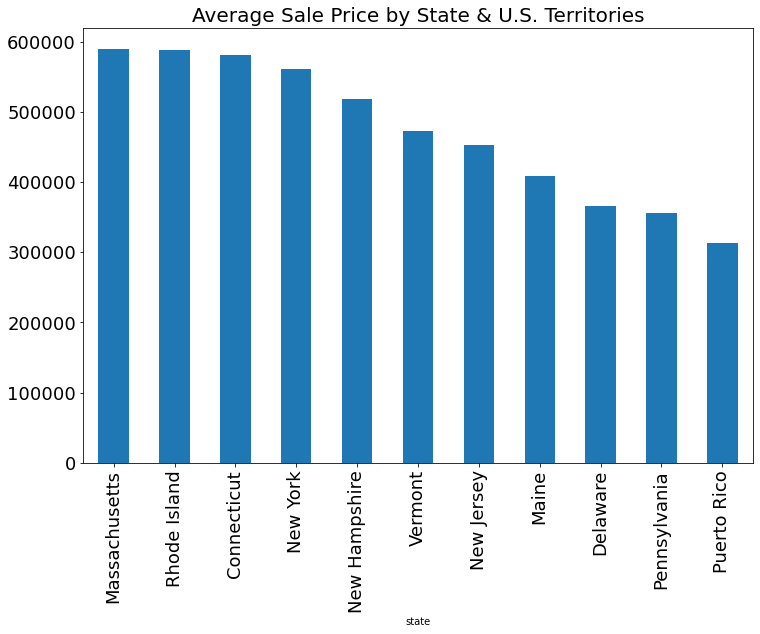

In [15]:
#create a bar graph that shows the average sale price for each state 

avg_price.sort_values(ascending=False).plot(x = '', y = '', kind = 'bar',title = '', figsize=(12,8))

plt.show
plt.title('Average Sale Price by State & U.S. Territories', fontsize=20)
#plt.ylabel('Home Sale Price', fontsize=18)
plt.yticks(fontsize=18)
#plt.xlabel('States & U.S. Territories', fontsize=18)
plt.xticks(fontsize=18);

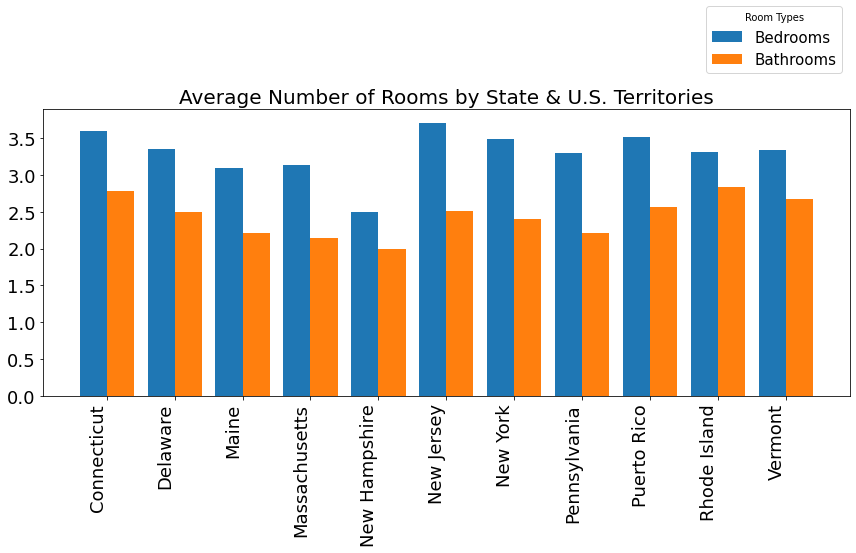

In [16]:
#put the list of states in alphabetical order
avg_states = sorted(diff_states, key=str.lower)

#create a list for the bedrooms
diff_bedrooms = state_average_df ["Average # of Bedrooms"].unique()

#create a list for the bathrooms
diff_bathrooms = state_average_df ["Average # of Bathrooms"].unique()

#create a bar graph that shows the average bedroom and bathroom for each state 
labels = avg_states
average_bedrooms = diff_bedrooms
average_bathrooms = diff_bathrooms

x = np.arange(len(labels))  # the label locations
width = .4  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, average_bedrooms, width, label='Bedrooms')
rects2 = ax.bar(x + width/2, average_bathrooms, width, label='Bathrooms')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_title('Average Number of Rooms by State & U.S. Territories', fontsize=20)
plt.yticks(fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, ha='right', fontsize=18)
ax.legend(title="Room Types", loc="lower right", fontsize=15, bbox_to_anchor = (1 , 1.1))

fig.tight_layout()

plt.show()

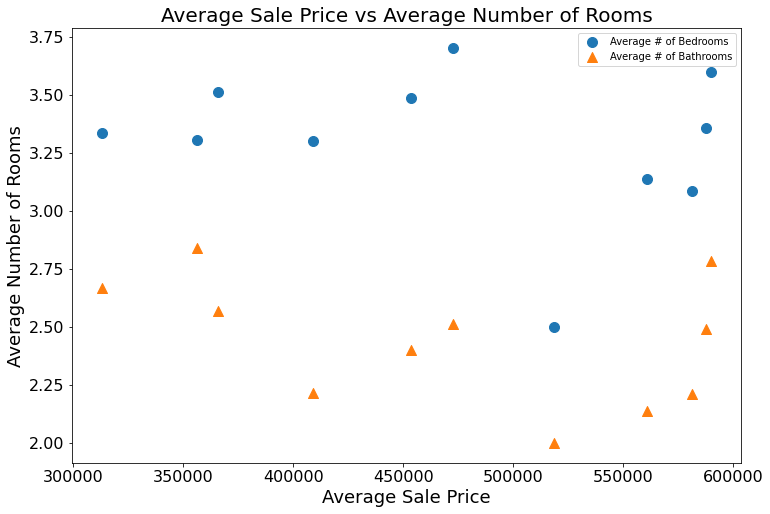

The correlation between the average home size and the average sale price is: 0.44745288788152704


In [87]:
#generated a scatter plot of the average # of rooms and how it compares to the sales price

fig1, ax1 = plt.subplots(figsize=(12,8))

#assign coordinates
x = avg_price
y1 = avg_bedroom #blue
y2 = avg_bathroom #orange
 
# depict illustration
plt.scatter(x, y1, label="Average # of Bedrooms", s = 100,)
plt.scatter(x, y2, label="Average # of Bathrooms", marker = '^', s = 100,)


ax1.set_title('Average Sale Price vs Average Number of Rooms',fontsize=20)
ax1.set_ylabel('Average Number of Rooms', fontsize=18)
ax1.set_xlabel('Average Sale Price', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
 
# apply legend()
plt.legend()
plt.show()


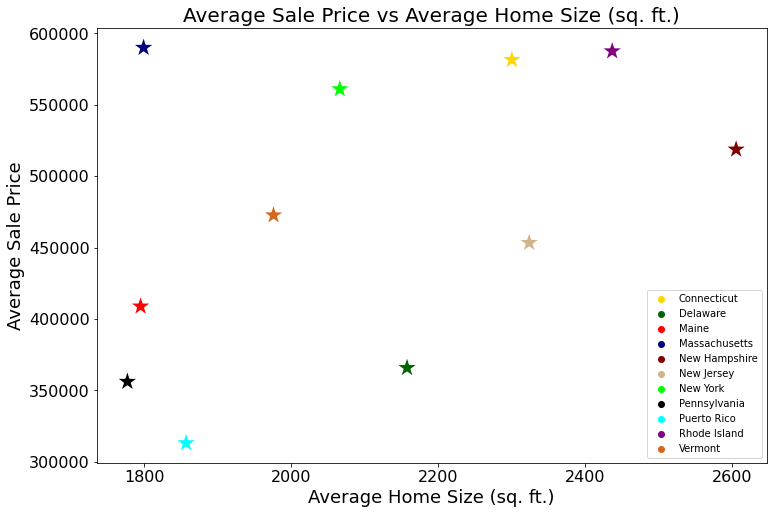

In [18]:
#generated a scatter plot of the average home size (square foot) vs. average sale price for all states & territories
fig1, ax1 = plt.subplots(figsize=(12,8))

x = avg_home_size
y = avg_price

state_names = ['Connecticut', 'Delaware', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'Vermont']

sns.scatterplot(x=x, y=y, hue=state_names, marker = '*', s = 600, palette=['gold', 'darkgreen', 'red', 'navy', 'maroon', 'tan', 'lime', 'black', 'aqua', 'purple', 'chocolate'])

ax1.set_title('Average Sale Price vs Average Home Size (sq. ft.)',fontsize=20)
ax1.set_ylabel('Average Sale Price', fontsize=18)
ax1.set_xlabel('Average Home Size (sq. ft.)', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()

The correlation between the average home size and the average sale price is: 0.44745288788152704


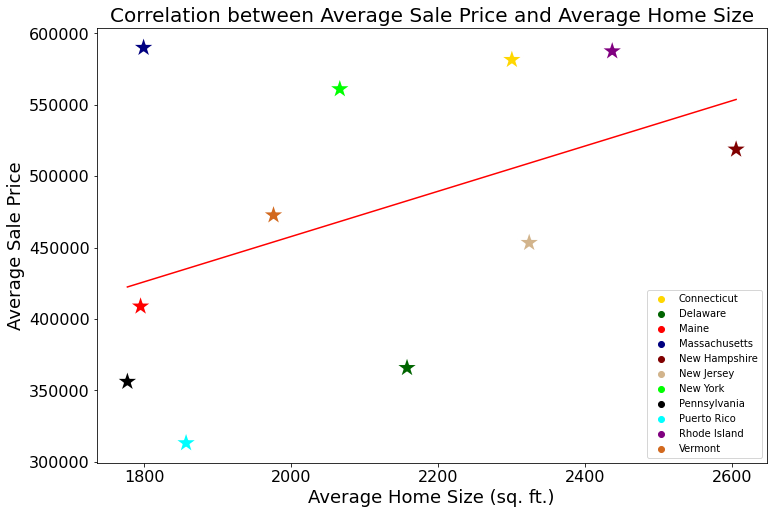

In [19]:
#calculated the correlation coefficient for the average home size and average price for all states & territories

correlation = avg_price.corr(avg_home_size)

print(f"The correlation between the average home size and the average sale price is: {correlation}")

fig1, ax1 = plt.subplots(figsize=(12,8))

#adds the title
plt.title('Correlation between Average Sale Price and Average Home Size', fontsize=20)
 
#plot the data
sns.scatterplot(x=x, y=y, hue=state_names, marker = '*', s = 600, palette=['gold', 'darkgreen', 'red', 'navy', 'maroon', 'tan', 'lime', 'black', 'aqua', 'purple', 'chocolate'])


 
#fits the best fitting line to the data
plt.plot(np.unique(avg_home_size),
         np.poly1d(np.polyfit(avg_home_size, avg_price, 1))
         (np.unique(avg_home_size)), color='red')
 
# Labelling axes
plt.xlabel('Average Home Size (sq. ft.)', fontsize=18)
plt.ylabel('Average Sale Price', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show();

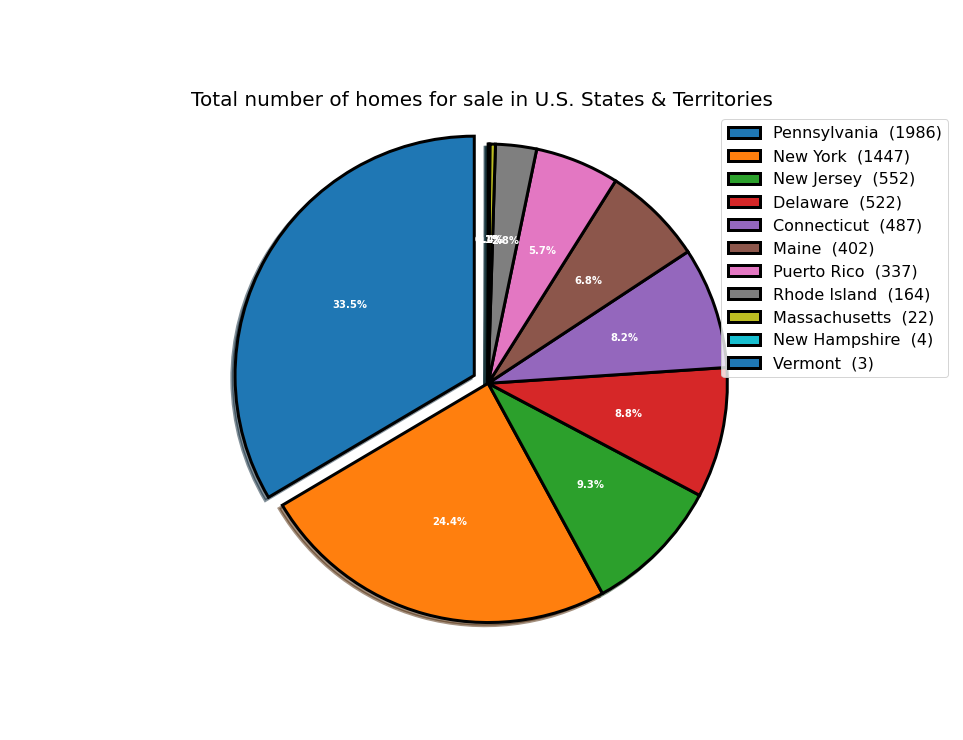

In [20]:
##created a pie chart to show the amount of homes in each state

wedgeprops = {"linewidth":3, "edgecolor":"black"} 

textprops={"color":"white",
"weight":"bold"}  

labels = 'Pennsylvania  (1986)', 'New York  (1447)', 'New Jersey  (552)', 'Delaware  (522)','Connecticut  (487)', 'Maine  (402)', 'Puerto Rico  (337)', 'Rhode Island  (164)','Massachusetts  (22)', 'New Hampshire  (4)', 'Vermont  (3)'
total_homes = [1986, 1447, 552, 522, 487, 402, 337, 164, 22, 4, 3]
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


fig1, ax1 = plt.subplots(figsize=(17, 10))
pie_chart = ax1.pie(total_homes, labels=labels, explode=explode, autopct='%1.1f%%', radius=1.5, startangle=90, shadow=True, rotatelabels=True, textprops=textprops, wedgeprops=wedgeprops)


#plt.legend(pie_chart, labels, loc="best")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.legend(title="Homes in States & U.S. Territories", loc="upper right", fontsize=16)
plt.legend(loc="upper right", fontsize=16)
plt.title("Total number of homes for sale in U.S. States & Territories", fontsize=20)
plt.show()

In [21]:
#created a dataframe to locate all information for the state of Pennsylvania
penn_df = clean_data_df.loc[clean_data_df['state']=='Pennsylvania']

#created a dataset that to get the price of the homes for sale in Pennsylvania
penn_home_price = penn_df['price']

#created a dataset that to get the size of the homes for sale in Pennsylvania
penn_home_size = penn_df['house_size']


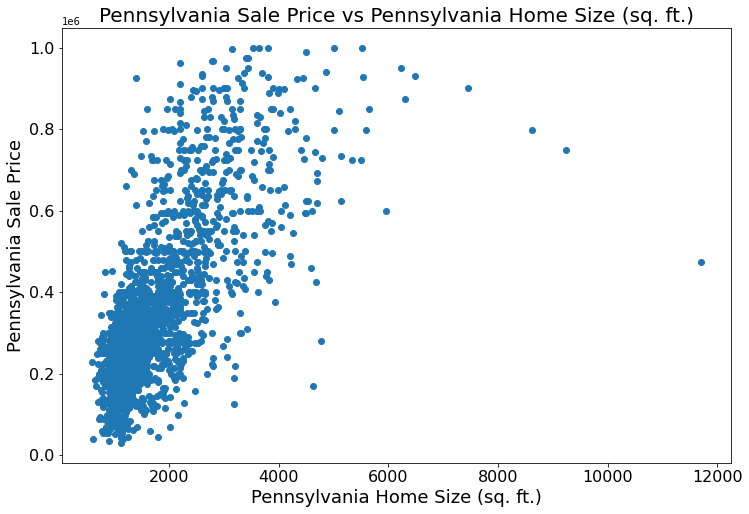

In [22]:
#created a scatter plot for the PA sale price vs PA home square footage. 

fig1, ax1 = plt.subplots(figsize=(12,8))

plt.scatter(penn_home_size, penn_home_price)
ax1.set_title('Pennsylvania Sale Price vs Pennsylvania Home Size (sq. ft.)', fontsize=20)
ax1.set_ylabel('Pennsylvania Sale Price', fontsize=18)
ax1.set_xlabel('Pennsylvania Home Size (sq. ft.)', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show();

The correlation between the Pennsylvania home size and Pennsylvania home sale price is: 0.702084978770267


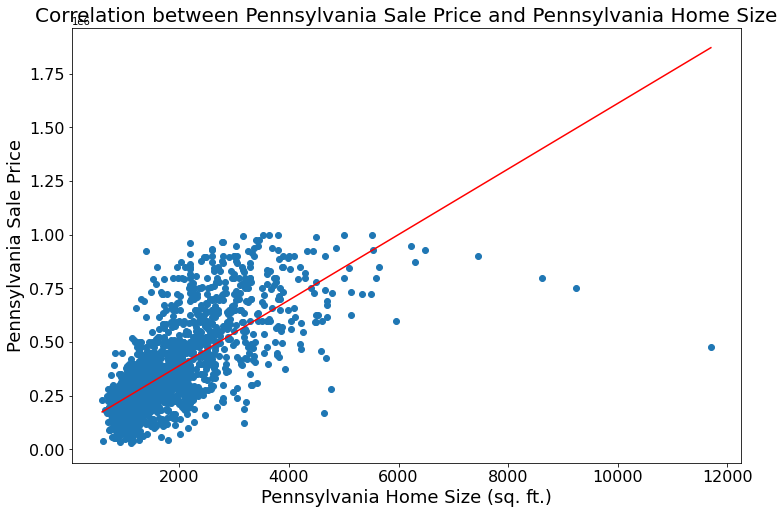

In [23]:
#calculated the correlation coefficient between the PA sale price & PA home size. 
penn_correlation = penn_home_price.corr(penn_home_size)

print(f"The correlation between the Pennsylvania home size and Pennsylvania home sale price is: {penn_correlation}")

fig1, ax1 = plt.subplots(figsize=(12,8))

# adds the title
plt.title('Correlation between Pennsylvania Sale Price and Pennsylvania Home Size',fontsize=20)
 
# plot the data
plt.scatter(penn_home_size, penn_home_price)
 
# fits the best fitting line to the data
plt.plot(np.unique(penn_home_size),
         np.poly1d(np.polyfit(penn_home_size, penn_home_price, 1))
         (np.unique(penn_home_size)), color='red')
 
# Labelling axes
plt.xlabel('Pennsylvania Home Size (sq. ft.)', fontsize=18)
plt.ylabel('Pennsylvania Sale Price', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show();